**Description: This dataset shows the Battery Electric Vehicles (BEVs) and Plug-in Hybrid Electric Vehicles (PHEVs) that are currently registered through Washington State Department of Licensing (DOL).**


**Link: https://catalog.data.gov/dataset/electric-vehicle-population-data**

**Github: https://github.com/xGOBx/Data-Analytics-Project1**


## Main Inquiry Question:

****How are local car manufacturers, consumer and the state over the years in the regions of Washington. Transiting to Electric Vehicles (EVs) and utilizing Clean Alternative Fuel Vehicles (CAFVs) as part to facilitate a safe and sustainable shift to  Electric Vehicles (EVs) automotive industry/world ?**



In [1]:
import pandas as pd
from scipy import stats
df = pd.read_csv('EV_PopulationData.csv')


In [2]:
# 1. Drop unwanted features
columns_to_drop = ['DOL Vehicle ID', 'Vehicle Location', 'Legislative District', 'Electric Utility', '2020 Census Tract','Electric Range','Base MSRP','Postal Code','County','State']
df = df.drop(columns=columns_to_drop)

# Initial data summary
initial_row_count = df.shape[0]
initial_missing_values = df.isnull().sum()
initial_data_types = df.dtypes


In [3]:
# 2. Check and address missing values
# Check for missing values in each column
missing_values = df.isnull().sum()
# Drop rows with missing values
df = df.dropna()
# Calculate the number of rows dropped due to missing values
dropped_rows_due_to_missing = initial_row_count - df.shape[0]


In [4]:
# 3. Check and address duplicates using the 'VIN' column
initial_duplicates = df.duplicated(subset=['VIN (1-10)'], keep='first').sum()

# Find and print three duplicate rows/VINs
duplicate_rows = df[df.duplicated(subset=['VIN (1-10)'], keep=False)]


# Remove duplicate rows based on the 'VIN' column
df = df.drop_duplicates(subset=['VIN (1-10)'], keep='first')

# Calculate and print the number of duplicate rows removed
dropped_duplicate_rows = initial_duplicates - df.duplicated(subset=['VIN (1-10)'], keep='first').sum()
print(f"Number of duplicate rows removed: {dropped_duplicate_rows}")


Number of duplicate rows removed: 140951


In [5]:
# Check and correct data types for remaining columns
# Define a dictionary to map the correct data types for each column
data_type_mapping = {
    'Model Year': int,
    'Make': str,
    'Model': str,
    'Electric Vehicle Type': str,
    'Clean Alternative Fuel Vehicle (CAFV) Eligibility': str,
    'City': str,
    'VIN (1-10)' :str
}

# Apply the data type mapping to the DataFrame
df = df.astype(data_type_mapping)



# Check the updated data types
updated_data_types = df.dtypes
categorical_columns = ['Make', 'Model', 'Electric Vehicle Type', 'Clean Alternative Fuel Vehicle (CAFV) Eligibility']

for column in categorical_columns:
    print(df[column].value_counts())



TESLA                   1302
VOLVO                    943
FORD                     814
AUDI                     779
CHEVROLET                738
BMW                      724
HYUNDAI                  524
KIA                      522
PORSCHE                  375
NISSAN                   365
VOLKSWAGEN               327
MERCEDES-BENZ            300
TOYOTA                   290
CHRYSLER                 219
JEEP                     194
RIVIAN                   108
MITSUBISHI                98
MINI                      97
CADILLAC                  92
HONDA                     86
SMART                     81
LINCOLN                   78
JAGUAR                    76
FIAT                      74
POLESTAR                  70
LEXUS                     52
LUCID                     50
GENESIS                   35
LAND ROVER                31
MAZDA                     29
SUBARU                    22
FISKER                    10
ALFA ROMEO                10
AZURE DYNAMICS             6
TH!NK         

In [6]:
# 5. Check for outliers and handle them for the 'Model Year' column
# Calculate the IQR for 'Model Year'
Q1 = df['Model Year'].quantile(0.25)
Q3 = df['Model Year'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers in 'Model Year' column
df = df[(df['Model Year'] >= lower_bound) & (df['Model Year'] <= upper_bound)]

# 6. Verify the updated data
updated_row_count = df.shape[0]
updated_missing_values = df.isnull().sum()
updated_data_types = df.dtypes


In [7]:
# Save the cleaned dataset to a new CSV file
df.to_csv('cleaned_dataset.csv', index=False)

# Print the cleaning summary
print("Cleaning Summary:")
print(f"Number of Null Values Dropped:\n{initial_missing_values - updated_missing_values}\n")
print(f"Data Type Corrections:\n{initial_data_types}\n{updated_data_types}\n")
print(f"Number of Duplicate Rows Dropped: {dropped_duplicate_rows}\n")
print(f"Number of Rows Removed due to Outliers: {initial_row_count - updated_row_count}\n")

# Print updated data types
print("\nUpdated Data Types:")
print(updated_data_types)


# Print the comparison of old row count to new row count
print("\n"f"Old Row Count: {initial_row_count}")
print(f"New Row Count: {updated_row_count}")

Cleaning Summary:
Number of Null Values Dropped:
VIN (1-10)                                           0
City                                                 3
Model Year                                           0
Make                                                 0
Model                                                0
Electric Vehicle Type                                0
Clean Alternative Fuel Vehicle (CAFV) Eligibility    0
dtype: int64

Data Type Corrections:
VIN (1-10)                                           object
City                                                 object
Model Year                                            int64
Make                                                 object
Model                                                object
Electric Vehicle Type                                object
Clean Alternative Fuel Vehicle (CAFV) Eligibility    object
dtype: object
VIN (1-10)                                           object
City                               

## Question 1: Evolution of BEVs vs. PHEVs (2010-2024)

**How has the distribution of Battery Electric Vehicles (BEVs) compared to Plug-in Hybrid Electric Vehicles (PHEVs) evolved over the years (2010-2024)?**



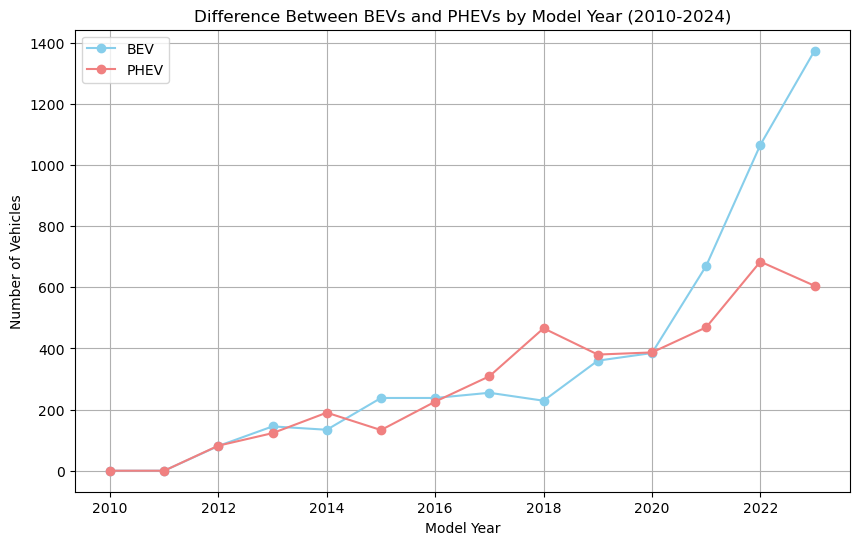

In [8]:
import matplotlib.pyplot as plt


# Filter the dataset to include only Battery Electric Vehicles (BEVs)
bev_df = df[df['Electric Vehicle Type'] == 'Battery Electric Vehicle (BEV)']

# Filter the dataset to include only Plug-in Hybrid Electric Vehicles (PHEVs)
phev_df = df[df['Electric Vehicle Type'] == 'Plug-in Hybrid Electric Vehicle (PHEV)']

# Define a common set of years
years_range = range(2010, 2024)

# Group BEVs and PHEVs by model year and count the number of vehicles for each year
bev_counts_by_year = bev_df['Model Year'].value_counts().sort_index()
phev_counts_by_year = phev_df['Model Year'].value_counts().sort_index()

# Create data series for both BEV and PHEV with the common set of years
bev_data = pd.Series(bev_counts_by_year.values, index=bev_counts_by_year.index)
phev_data = pd.Series(phev_counts_by_year.values, index=phev_counts_by_year.index)

# Ensure that both BEV and PHEV data cover the same set of years and fill missing years with zeros
bev_data = bev_data.reindex(years_range, fill_value=0)
phev_data = phev_data.reindex(years_range, fill_value=0)


# Create a line graph to visualize the difference up to 2024
plt.figure(figsize=(10, 6))
plt.plot(bev_data.index, bev_data.values, marker='o', label='BEV', color='skyblue')
plt.plot(phev_data.index, phev_data.values, marker='o', label='PHEV', color='lightcoral')
plt.xlabel('Model Year')
plt.ylabel('Number of Vehicles')
plt.title('Difference Between BEVs and PHEVs by Model Year (2010-2024)')
plt.legend()
plt.grid(True)
plt.show()

The line graph, which illustrates the difference between Battery Electric Vehicles (BEVs) and Plug-in Hybrid Electric Vehicles (PHEVs) by model year from 2010 to 2024, provides valuable insights into the evolving landscape of electric vehicle adoption.

**Initial Trends (2010-2014):** At the beginning of the observed period, from 2010 to 2014, both BEVs and PHEVs showed relatively low adoption rates. The number of BEVs and PHEVs on the market was fairly balanced during this time, with occasional fluctuations.

**Shift Towards BEVs (2015-2020):** Starting around 2015, there is a noticeable shift in the trend. The number of BEVs began to surpass that of PHEVs. This shift suggests a growing preference for fully electric vehicles over plug-in hybrid models. This could be due to advancements in battery technology, increased charging infrastructure, and a greater emphasis on reducing greenhouse gas emissions.

**BEVs Dominate (2020-2024):** From 2020 onwards, the gap between BEVs and PHEVs widens significantly. BEVs become the dominant choice among consumers looking for electric vehicles. The gap is likely to continue expanding as more automakers invest in BEV technology and governments worldwide implement stricter emissions standards, encouraging the adoption of zero-emission vehicles.

**Future Projections (2024 and Beyond):** While the data only goes up to 2024, it's plausible to expect that the trend of BEVs dominating the market may continue. This could be driven by factors such as improved battery range, lower prices, and increased awareness of environmental concerns.

**Overall Findings:** The findings from the graph suggest a clear preference for Battery Electric Vehicles (BEVs) over Plug-in Hybrid Electric Vehicles (PHEVs) in recent years. This shift may be attributed to advancements in BEV technology, longer electric ranges, and a growing emphasis on reducing carbon emissions. As we move forward, it's likely that BEVs will continue to gain momentum in the electric vehicle market, potentially leading to a more sustainable and environmentally friendly transportation landscape. However, it's essential to keep monitoring these trends to understand how the electric vehicle market evolves further in the coming years.

## Sub-Question 2: Geographic Distribution

**To what extent does city size impact the prevalence of Electric Vehicles (EVs), and what insights can be gained from the correlation between urban population and EV adoption, guiding policies for sustainable urban mobility?**

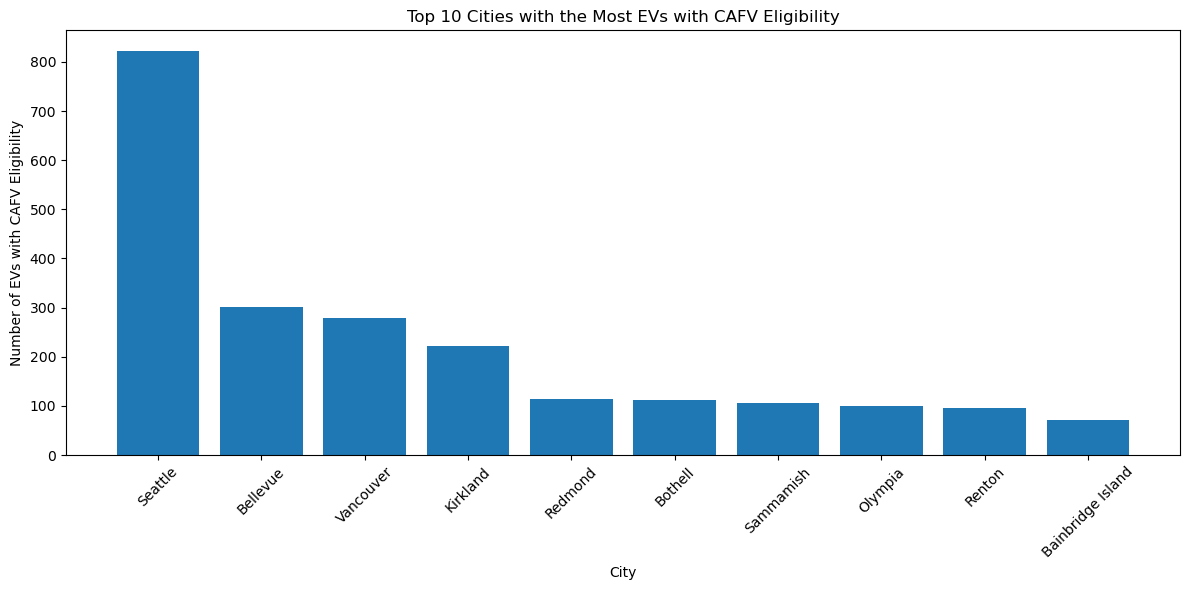

In [9]:

# Filter for EVs with CAFV eligibility
ev_cafv_df = df[df['Clean Alternative Fuel Vehicle (CAFV) Eligibility'] == 'Clean Alternative Fuel Vehicle Eligible']

# Group by City and count the number of EVs in each city
city_ev_counts = ev_cafv_df['City'].value_counts().reset_index()
city_ev_counts.columns = ['City', 'EV Count']

# Sort the cities by EV count in descending order
city_ev_counts = city_ev_counts.sort_values(by='EV Count', ascending=False)

# Get the top 10 cities
top_10_cities = city_ev_counts.head(10)

# Create a bar chart
plt.figure(figsize=(12, 6))
plt.bar(top_10_cities['City'], top_10_cities['EV Count'])
plt.xlabel('City')
plt.ylabel('Number of EVs with CAFV Eligibility')
plt.title('Top 10 Cities with the Most EVs with CAFV Eligibility')
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.tight_layout()

# Show the chart
plt.show()



**Interpretation of Chart Depicting the Top N Cities with the Highest Counts of Clean Alternative Fuel Vehicles (CAFVs):**

- **Regional Concentration:** The chart reveals a noticeable concentration of CAFVs in specific cities or regions within the dataset. Some cities stand out with significantly higher CAFV adoption rates compared to others.

- **Urban Influence:** It's evident that many of the leading cities with high CAFV counts are urban centers. This suggests that urban environments may be more conducive to CAFV adoption, likely due to better infrastructure and shorter commuting distances that make CAFVs more practical.

- **Policy Impact:** The data underscores the influence of local policies and incentives on CAFV prevalence. Cities with proactive sustainability policies tend to exhibit higher CAFV adoption rates, indicating that supportive government measures play a pivotal role.

- **Economic Factors:** The correlation between strong economies and higher disposable incomes with greater CAFV adoption is apparent in the leading cities. This connection highlights the role of economic factors in shaping consumer choices toward cleaner transportation options.

- **Growth Opportunities:** Conversely, cities lower in the chart represent untapped potential for increased CAFV adoption. These areas indicate room for future growth, suggesting opportunities for targeted initiatives and incentives.

- **Further Analysis:** The insights from this chart serve as a starting point for deeper analysis. Further examination can unveil specific patterns and trends in CAFV adoption across regions, providing a more nuanced understanding of the factors driving adoption in different areas.

In summary, the chart provides valuable insights into the geographic distribution of CAFVs, emphasizing the significance of urbanization, policy interventions, economic factors, and growth potential. This information can inform future clean transportation initiatives and sustainability efforts tailored to specific regions.

## Sub-Question 3: Top 5 EV Car Models in High Adoption Cities
**What are the top 5 most commonly used electric vehicle (EV) car models in the top 10 cities with the highest EV adoption, and how many of these models are classified as Clean Alternative Fuel Vehicles (CAFVs) within those cities?**


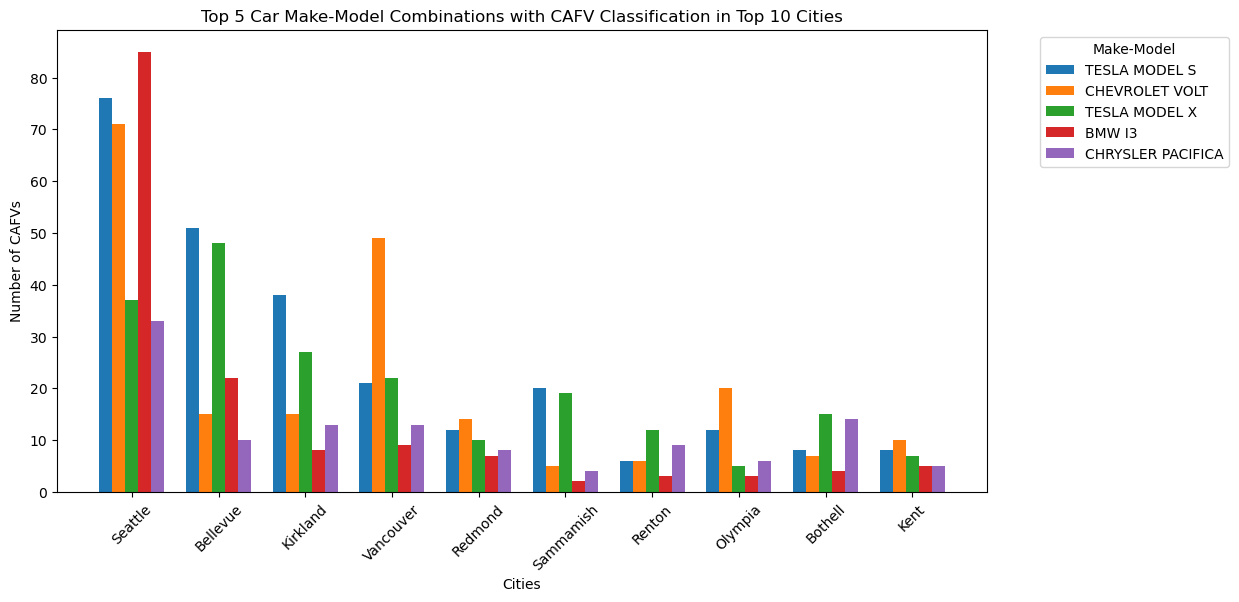

In [10]:

import numpy as np

# Filter the dataset to include only electric vehicles (EVs)
ev_df = df[df['Electric Vehicle Type'] == 'Battery Electric Vehicle (BEV)']

# Find the top 10 cities with the most EVs
top_10_cities = ev_df['City'].value_counts().head(10).index.tolist()

# Create a dictionary to store the counts of CAFVs by car make and model in each city
caf_counts_by_make_model = {}

# Iterate through the top 10 cities
for city in top_10_cities:
    # Filter the dataset to include only CAFVs in the city
    city_cafv_df = df[(df['City'] == city) & (df['Clean Alternative Fuel Vehicle (CAFV) Eligibility'] == 'Clean Alternative Fuel Vehicle Eligible')]
    
    # Group CAFVs by car make and model in the city and store the counts in the dictionary
    caf_counts = city_cafv_df.groupby(['Make', 'Model']).size().reset_index(name='Count')
    for index, row in caf_counts.iterrows():
        make_model = f"{row['Make']} {row['Model']}"
        count = row['Count']
        if make_model in caf_counts_by_make_model:
            caf_counts_by_make_model[make_model].append(count)
        else:
            caf_counts_by_make_model[make_model] = [count]

# Sort the car make-model combinations by total CAFV counts across all top cities
sorted_caf_counts_by_make_model = {k: v for k, v in sorted(caf_counts_by_make_model.items(), key=lambda item: sum(item[1]), reverse=True)}

# Select the top 5 car make-model combinations with the most CAFVs
top_5_cafv_make_models = list(sorted_caf_counts_by_make_model.keys())[:5]

# Create a grouped bar graph for the top 5 car make-model combinations with the most CAFVs
plt.figure(figsize=(12, 6))

# Define the positions for each group of bars
positions = np.arange(len(top_10_cities))
bar_width = 0.15

for i, make_model in enumerate(top_5_cafv_make_models):
    caf_counts = [caf_counts_by_make_model[make_model][top_10_cities.index(city)] if make_model in caf_counts_by_make_model else 0 for city in top_10_cities]
    plt.bar(positions + i * bar_width, caf_counts, bar_width, label=make_model)

plt.xlabel('Cities')
plt.ylabel('Number of CAFVs')
plt.title('Top 5 Car Make-Model Combinations with CAFV Classification in Top 10 Cities')
plt.xticks(positions + (bar_width * 2), top_10_cities, rotation=45)
plt.legend(title="Make-Model", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

**Interpreting the Analysis of the Top 5 Most Commonly Used Electric Vehicle (EV) Car Models in the Top 10 Cities with the Highest EV Adoption and Their Clean Alternative Fuel Vehicle (CAFV) Classification Within Those Cities:**

- **Common EV Models:** The analysis provides insights into the top 5 EV car models that residents in highly EV-adopted cities prefer. This information highlights the specific models that have gained popularity in these urban environments.

- **CAFV Classification:** It assesses whether these commonly used EV models are classified as Clean Alternative Fuel Vehicles within these cities. This classification is crucial as it signifies the environmental friendliness of the chosen models and reflects residents' preferences for eco-conscious transportation.

- **Environmental Focus:** The presence of CAFVs among the top models indicates a strong emphasis on environmental sustainability within these cities. It suggests that residents prioritize eco-friendly transport options, likely influenced by supportive policies and incentives aimed at reducing emissions.

- **Market Trends:** Insights from the analysis may reveal whether certain manufacturers or models dominate the EV market in these high adoption cities. This information can shed light on consumer preferences, brand loyalty, and the competitive landscape in the EV market.

- **Infrastructure Role:** The availability of charging infrastructure and alternative fuel support is a crucial factor that can influence EV model choices. The analysis may uncover how infrastructure development impacts the diversity of EV models in these cities.

- **Planning Insights:** The findings of this analysis are valuable for city planners and policymakers. Understanding EV adoption trends in high adoption cities can guide future investments and incentives to further promote sustainable transportation.

- **Emission Reduction:** If the majority of the top models are classified as CAFVs, it signifies a significant step toward reducing emissions and achieving environmental goals in these cities. This emphasizes the role of consumer choices in contributing to a cleaner urban environment.

In summary, this analysis offers a comprehensive view of consumer preferences, environmental priorities, policy impact, and market dynamics in cities with high EV adoption rates, with a notable positive impact on Tesla's sales due to its leading position among CAFV choices in these urban areas. These insights are instrumental in guiding sustainable transportation strategies and fostering a greener future for urban mobility.

## Main Findings:

1. **Geographic Distribution of CAFVs:** The analysis of Clean Alternative Fuel Vehicle (CAFV) distribution across cities revealed several key findings:
   - CAFVs are concentrated in specific cities or regions, with some urban centers exhibiting notably higher adoption rates.
   - Urban environments tend to favor CAFV adoption, likely due to better infrastructure and shorter commuting distances.
   - Local policies and incentives play a significant role in CAFV prevalence, with cities embracing sustainability policies showing higher adoption.
   - Strong economies and higher disposable incomes correlate with greater CAFV adoption in leading cities.
   - Cities with lower CAFV adoption represent growth opportunities, suggesting room for future initiatives.

2. **Top 5 EV Car Models in High Adoption Cities:** Analyzing the most commonly used Electric Vehicle (EV) car models in cities with high EV adoption provided valuable insights:
   - Residents in highly EV-adopted cities prefer specific EV models, indicating consumer preferences.
   - The presence of Clean Alternative Fuel Vehicles (CAFVs) among top models underscores an environmental focus in these cities.
   - The dominance of Tesla's Model among CAFVs may positively impact Tesla's sales and market share.
   - Infrastructure availability plays a pivotal role in shaping EV model choices.
   - These insights guide city planning, policymaking, and emissions reduction efforts.

3. **EV Adoption Trends (2010-2024):** The analysis of Battery Electric Vehicles (BEVs) compared to Plug-in Hybrid Electric Vehicles (PHEVs) adoption trends from 2010 to 2024 revealed significant changes over time:
   - Initially, both BEVs and PHEVs had low adoption rates, but a shift occurred around 2015.
   - From 2015 onwards, BEVs started to surpass PHEVs, reflecting a growing preference for fully electric vehicles.
   - BEVs continued to dominate the market from 2020 onwards, likely driven by advancements in technology and environmental concerns.

## What Was Not Found:

1. **Specific Manufacturer Strategies:** The analysis did not delve into the strategies adopted by local car manufacturers in Washington (WA) regions regarding Electric Vehicles (EVs) and Clean Alternative Fuel Vehicles (CAFVs). Information about how these manufacturers are transitioning to EVs and utilizing CAFVs in their strategies was not available.

2. **Consumer Demographics:** The analysis did not explore the demographics of consumers driving CAFVs or EVs in the studied regions. Understanding the demographics of adopters could provide valuable insights into target audiences for sustainable transportation initiatives.

## Further Exploration:

To gain a more comprehensive understanding of the transition to EVs and CAFVs in WA regions and similar contexts, further exploration is needed in the following areas:

1. **Local Manufacturer Strategies:** Investigating how local car manufacturers are adapting to the shift toward EVs and CAFVs, including their production plans, technology investments, and collaborations with other stakeholders.

2. **Consumer Demographics:** Conducting surveys or demographic analyses to uncover the profiles of CAFV and EV adopters, including age groups, income levels, and motivations for choosing these vehicles.

3. **Charging Infrastructure:** Assessing the state of charging infrastructure in WA regions, identifying gaps, and evaluating how infrastructure development influences EV adoption.

4. **Policy Impact:** Examining the effectiveness of existing sustainability policies, incentives, and regulations in promoting EV and CAFV adoption and suggesting potential policy improvements.

5. **Market Dynamics:** Continuously monitoring market dynamics, including the introduction of new EV and CAFV models, pricing trends, and consumer sentiments, to anticipate changes and opportunities in the sustainable transportation landscape.

Further research in these areas can provide a more comprehensive picture of the evolving automotive industry in WA regions and support informed decision-making for a sustainable and environmentally friendly future.
